<a href="https://colab.research.google.com/github/nallagondu/FlipRoboTechnologies/blob/main/Project_1_Discussion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

The dataset contains the data like customer.on the basis of the data we have to predect the chunrte by the customer


The dataset contains the data like customerID .on the basis of the data we have to predect the chunrte by the 'customer', age,gender   etc



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/Datasets/main/Telecom_customer_churn.csv")
df

In [ ]:
df.shape


In [ ]:
df.head()

This details contains rows and columns out of which 1 is target variable and remaining 20 are independent variables

In [ ]:
df.columns

In [ ]:
df.columns.tolist()
#Checking the columns of the dataset


In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
df.info()

As we can see there are no null values present in this dataset . THis gives the brief

In [ ]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

what is Heatmap ? what is the use of it  ?


In [ ]:
df['TotalCharges'].unique()

In [ ]:
df['TotalCharges'].nunique()

In [ ]:
#checking the value counts of each column

for i in df.columns:
  print(df[i].value_counts())
  print("\n")

These are the value counts of all columns and we can see blank in TotalCharges column .
Lets check out the unique value of the column

In [ ]:
#Checking the unique values of Total Charges column
df['TotalCharges'].unique()

In [ ]:
df.shape[0]

we can noticed that the 'TotalCharges' has continous data but its reflecting as object datatype.and 11 records of this column has blank data.Lets us handle this column.



In [ ]:
df.loc[df["TotalCharges"]== " "]

By locating the TotalCharges we can find this column has space as values but it was showing 0 missing values in this column .lets fil this column by some values

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df["TotalCharges"].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
# to convert the Object datatype to float datatype

df['TotalCharges'] = df['TotalCharges'].astype(float)


In [ ]:
df['TotalCharges'].dtype

Now we can see total changes columns has some space values which is replaced by nan values .
Now we can handle the Nan values

In [ ]:
df.info()

we have converted the datatype of "TotalCharges' form object to float

In [ ]:
df.isnull().sum()

as we have filled blank spaces witn 'Nan' values in TotalChanges ,its showing 11 null values in that column.

replacing the Nan values using Mean method as the data has continues values

In [ ]:
np.mean(df["TotalCharges"])

In [ ]:
df.iloc[488:500,:]

In [ ]:
#Checking the Mean of TotalCharges column

print("the mean value of TotalCharges is :",df["TotalCharges"].mean())


In [ ]:
#Filling null values in TotalCharges with its mean

df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [ ]:
df.isnull().sum()

In [ ]:
#Lets check the null values again
sns.heatmap(df.isnull(), cmap = 'cool_r')

In [ ]:
df.iloc[488 , :]

Now we cnan see there is no missing value in any of the column


In [ ]:
#seperating Numerical and categorical columns
# Checking for Categorical Columns

categorical_col = []
for i in df.dtypes.index:
  if df.dtypes[i] == 'object':
    categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

#checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
  if df.dtypes[i]!="object":
    numerical_col.append(i)
print("Numerical columns:", numerical_col)



In [ ]:
#checking number of unique values in each column
df.nunique().to_frame("No of unique values ")

these are the unique values present in the dataset .here Customer ID column has the data of unique ID to the customers which can be dropped

In [ ]:
#Dropping Customer ID column
df.drop("customerID",axis = 1,inplace = True)

In [ ]:
df.head()

In [ ]:
#Checking the list of counts of target
df["Churn"].unique()

There are two categories present in the target column namely "yes" and "no"

In [ ]:
#Checking the unique values in target column
df['Churn'].value_counts()

We  can assume that " no " stands for the customers who have not churned and "yes" stands for the customers who have got churched form the company

In [ ]:
df.describe()

This gives the statistical information of the numerical columns .the summary of the dataset looks perfect SINCE THERE IS NO NEGITIVE /INCVALID VALUES PRESNET .


from the above description we can observer the following :

1. the count of all the columns are same which means there are no missing values in the dataset
2.the mean value is greater than the median(50%) in tenure and TotalCharges columns whicn means the data is skewed to right in these column
3.the data in the column Monthly Charges have mean values less than median which means the data is skewed to left
4.By summarizing the data we can observe there is a huge differences between 75% and max hance there are outliers present int the data
5.we can also notice the snadard deviation ,Min 25% percentile values form this sebcribe method

DATA Visualization

Univariate analysis

In [ ]:
#Visualize the number of churned customers

ax = sns.countplot(x = 'Churn', data = df)
print(df['Churn'].value_counts())

We can Observer that the count of "No Chrun" are high compared to the count of "yes Chrun" .i.e there are more number of customers whi have not churned .this leads to class imblance issue in the data .we will recitfy it by using oversampling method in later part

In [ ]:
# Visualizing the count of gender
print(df['gender'].value_counts())
ax = sns.countplot(x='gender',data = df)
plt.show()


From the plot we can observe that the total number of males and females are almost same

In [ ]:
#Visualizing the count of seniorCitizen

print(df['SeniorCitizen'].value_counts())
ax = sns.countplot(x = 'SeniorCitizen',data = df)
plt.show()

In [ ]:
#Visualizing the count of Partner

print(df['Partner'].value_counts())
ax = sns.countplot(x = 'Partner',data = df)
plt.show()

Non Partners are bit high in count of customers having partners

In [ ]:
#Visualizing the count of Dependents

print(df['Dependents'].value_counts())
ax = sns.countplot(x = 'Dependents',data = df)
plt.show()

The customer who have dependent are  bit diffrenrt

In [ ]:
#Visualizing the count of MultipleLines

print(df['MultipleLines'].value_counts())
ax = sns.countplot(x = 'MultipleLines',data = df)
plt.show()

In [ ]:
#Visualizing the count of OnlineSecurity

print(df['OnlineSecurity'].value_counts())
ax = sns.countplot(x = 'OnlineSecurity',data = df)
plt.show()

In [ ]:
#Visualizing the count of OnlineBackup

print(df['OnlineBackup'].value_counts())
ax = sns.countplot(x = 'OnlineBackup',data = df)
plt.show()

In [ ]:
#Visualizing the count of DeviceProtection

print(df['DeviceProtection'].value_counts())
ax = sns.countplot(x = 'DeviceProtection',data = df)
plt.show()

In [ ]:
#Visualizing the count of StreamingTV

print(df['StreamingTV'].value_counts())
ax = sns.countplot(x = 'StreamingTV',data = df)
plt.show()

In [ ]:
#Visualizing the count of tenure

print(df['tenure'].value_counts())
ax = sns.countplot(x = 'tenure',data = df)
plt.show()

In [ ]:
#lets check how the data distributed remaining column
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
  if plotnumber<=4:
    ax = plt.subplot(2,2, plotnumber)
    sns.distplot(df[col],color = "m")
    plt.xlabel(col, fontsize = 12)
    plt.yticks(rotation = 0,fontsize = 10)
  plotnumber+=1
plt.tight_layout()


From the above distribution plots we can notice that the data almost looks normal in all columns except senior citizen ,and the data in the column TotalChanges is skewed to the right .Other two columns tenure and montly Changes do not have skewness

#**Bivatiate Analysis**

In [ ]:
#Comparing tenure and Senior citizen
plt.title("Comparing between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen", y = "tenure", data = df)
plt.show()

There is no significent between the features ,here both the fatures are in equal length *italicised text*

In [ ]:
#Comparing tenure and TotalCharges
plt.title("Comparision beteen  tenure and TotalCharges")
sns.stripplot(x = "TotalCharges", y = "tenure", data = df,hue = 'Churn', palette = 'bright')
plt.show()

In [ ]:
#Comparing tenure and TotalCharges 2
plt.title("Comparision beteen  tenure and TotalCharges 2 ")
sns.stripplot(x = "tenure", y = "TotalCharges", data = df,hue = 'Churn', palette = 'bright')
plt.show()

Here we can notice the strong linear relation between the features
as the tenure increases ,TotalCharges also increases rapidly.if the customers have low tenure services then there is high chance of churn

In [ ]:
#Comparing gender and SeniorCitizen
plt.title("Comparision beteen  gender and SeniorCitizen  ")
sns.barplot(x = "gender", y = "SeniorCitizen", data = df,hue = 'Churn', palette = 'winter_r')
plt.show()

There is no significent between the column,the customers churns remins unaffected in gender and Seniorcitizen case

In [ ]:
#Comparing TotalCharges and MonthlyCharges
plt.title("Comparing TotalCharges and MonthlyCharges ")
sns.scatterplot(x = "TotalCharges", y = "MonthlyCharges", data = df,hue = 'Churn', palette = 'bright')
plt.show()

There is a linier relationship between the features .The customer with high monthly charges have high tendency to stop the services since they have high total charges .

Also if the customers ready to contribute with the monthly charges then there is an increment in the total charges .

In [ ]:
#checking Churn Level and gender

sns.catplot(x = 'Churn',col = 'gender', data = df,kind = "count", palette = "winter_r")
#checking Churn Level and Partner
sns.catplot(x = 'Churn',col = 'Partner', data = df,kind = "count", palette = "tab20b_r")




In [ ]:
#checking Churn Level and Dependents
sns.catplot(x = 'Churn',col = 'Dependents', data = df,kind = "count", palette = "winter_r")


#checking Churn Level and PhoneService
sns.catplot(x = 'Churn',col = 'PhoneService', data = df,kind = "count", palette = "Dark2")

plt.show()


1.in the first plot we can see there is no significant difference in the genders,both the genders have equal churn level.

2.in second plot ,we can see the customers without parents have high churn rate compated to the customers with partners

3.The cistomerwho do not have any dependenc have high  churn rate compared to the customers who have dependents

4.in the last plot we can notice the customers who have phone servce have high tendency  of gtting churned

In [ ]:
#checking Chrun Level and MultipleLines
sns.catplot(x = 'MultipleLines', col = 'Churn', palette = "ocean", kind = "count",data = df )

#checking Churn Level and Dependents
sns.catplot(x = 'Churn',col = 'Dependents', data = df,kind = "count", palette = "winter_r")


#checking Churn Level and PhoneService
sns.catplot(x = 'Churn',col = 'PhoneService', data = df,kind = "count", palette = "Dark2")

plt.show()


**Multivariate Analysis**

In [ ]:
sns.pairplot(df,hue = 'Churn', palette= "Dark2")
plt.show()

1. The pairplot gives the pairwise relation between the features on the basis of the target "Churn" .on the diagonal we can notice the distrubution plots

2. the feature tenure and TotalCharges ,monthlyChrges and totalhrges have strong linear relation with each other

3. There are no outliers in any of the columns but lets plot box plot to identify the outliers


***Cheacking for Outliers ***

In [ ]:
#Lets check the outliers by plotting boxplot
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
  if plotnumber<=4:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(df[col], palette = "Dark2")
    plt.xlabel(col, fontsize = 15)
    plt.yticks(rotation = 0, fontsize = 10)
  plotnumber+=1
plt.tight_layout()



The column Seniorcitizen had outliers but it contains categoricl data so no need to remove outliers.

apart form this none of the columns have outliers

##**Checking the Skewness **

In [ ]:
#Encoding the categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
  if df[i].dtypes == 'object':
      df[i]= OE.fit_transform(df[i].values.reshape(-1, 1))
df



**NOTE : Encoding methods in data science are essential techniques for converting categorical data into numerical formats that machine learning algorithms can process. These methods ensure that the data retains its inherent meaning and relationships. Here are some common encoding methods used in data science:

**1. Label Encoding**
Label encoding involves converting categorical values into numerical labels. Each unique category is assigned a unique integer. This method is simple but can introduce ordinality where it may not exist.

Example:
mathematica
Copy code
Color: [Red, Green, Blue, Green]
Encoded: [0, 1, 2, 1]


**2. One-Hot Encoding**
One-hot encoding transforms categorical variables into a series of binary columns, each representing a unique category. This method avoids the issue of implied ordinality but increases the dimensionality of the dataset.

Example:
mathematica
Copy code
Color: [Red, Green, Blue, Green]
Encoded:
Red   Green Blue
1     0     0
0     1     0
0     0     1
0     1     0


**3. Binary Encoding**
Binary encoding is a compromise between label and one-hot encoding. It converts categories into binary codes and then splits those binary digits into separate columns.

Example:
mathematica
Copy code
Color: [Red, Green, Blue, Green]
Encoded:
001
010
011
010


**4. Target Encoding (Mean Encoding)**
Target encoding replaces categorical values with the mean of the target variable. This method is particularly useful for high-cardinality categorical variables.

Example:
yaml
Copy code
Category: [A, B, A, C]
Target: [1, 0, 1, 0]
Mean Encoded: [1, 0, 1, 0]


**5. Frequency Encoding**
Frequency encoding involves replacing categories with their frequency of occurrence in the dataset. This method retains some information about the distribution of categories.

Example:
makefile
Copy code
Category: [A, B, A, C, B, B, A]
Frequencies: [3, 3, 3, 1, 3, 3, 3]


**6. Hashing Encoding (Feature Hashing)**
Hashing encoding uses a hash function to convert categories into numerical values, typically to reduce dimensionality in high-cardinality datasets. This method can result in collisions, where different categories are hashed to the same value.

Example:
mathematica
Copy code
Category: [A, B, C]
Hashed Encoded:
Hash(A) -> 2
Hash(B) -> 3
Hash(C) -> 1

**7. Ordinal Encoding**
Ordinal encoding assigns an integer value to each category based on some predefined or natural ordering. This is useful when the categories have a clear ordering.

Example:
mathematica
Copy code
Size: [Small, Medium, Large]
Encoded: [0, 1, 2]

**8. Leave-One-Out Encoding**
Leave-one-out encoding is a variant of target encoding where the current target value is excluded from the mean calculation for each category. This helps in preventing data leakage.

Example:
makefile
Copy code
Category: [A, A, B, B]
Target: [1, 2, 0, 1]
Encoded: [2/1, 1/1, 1/2, 0/1]
Choosing the Right Encoding Method
Selecting the appropriate encoding method depends on the nature of the data and the specific requirements of the machine learning model:


**Low Cardinality: One-hot encoding.**
High Cardinality: Target encoding, binary encoding, or hashing encoding.
Ordinal Data: Ordinal encoding.
Avoiding Data Leakage: Leave-one-out encoding.
Understanding these methods allows data scientists to preprocess categorical data effectively, ensuring better performance and accuracy in machine learning models.

In [ ]:
df.skew()

#.skew() method is used to calculate the skewness of each numerical column in a DataFrame. Skewness is a statistical measure that describes the asymmetry of the distribution of values in a dataset. The skewness can be positive, negative, or zero.

#Positive Skew (Right Skew): The right tail (larger values) is longer or fatter than the left tail. This indicates that the distribution has a long tail on the right side.
#Negative Skew (Left Skew): The left tail (smaller values) is longer or fatter than the right tail. This indicates that the distribution has a long tail on the left side.
#Zero Skew: The values are symmetrically distributed around the mean.
#Using df.skew() in Pandas

The columns SeniorCitizen and TotalCharges have skewness in the data.

since SeniorCitizen is categotical no need to remove skewness .

since TotalCharges is continuous in natures,lets use cube root method to remove skeness


**Removing the Skewness**

In [ ]:
#removing skewness using cuberoot method

df['TotalCharges'] = np.cbrt(df['TotalCharges'])

removed the skewness using cube root method

In [ ]:
#lets check the skewness again
df.skew()

In [ ]:
#Lets check the outliers by plotting boxplot
plt.figure(figsize = (10, 6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
  if plotnumber<=4:
    ax = plt.subplot(2,2, plotnumber)
    sns.boxplot(df[col], palette = "Dark2")
    plt.xlabel(col, fontsize = 15)
    plt.yticks(rotation = 0, fontsize = 10)
  plotnumber+=1
plt.tight_layout()



After Skewness ,TotalCharges got normal ,No outliers

In [ ]:
#Lets visualize how the data has been distrubuted in TotalCharges after removing skewness

sns.distplot(df['TotalCharges'], color = "m", kde_kws = {"shade": True}, hist =False)
plt.show()

Here looks almost normal and skewness is also removed

In [ ]:
df.info()

We have converted  the categarical columns into numerical columns using OrdinalEncoding method

In [ ]:
df.describe()

In [ ]:
#correlation between target variable and independent variable

cor = df.corr()
cor

In [ ]:
#using heatmap
#visualize the correlation matrix by plotting headmap

plt.figure(figsize = (20 , 15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot= True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()


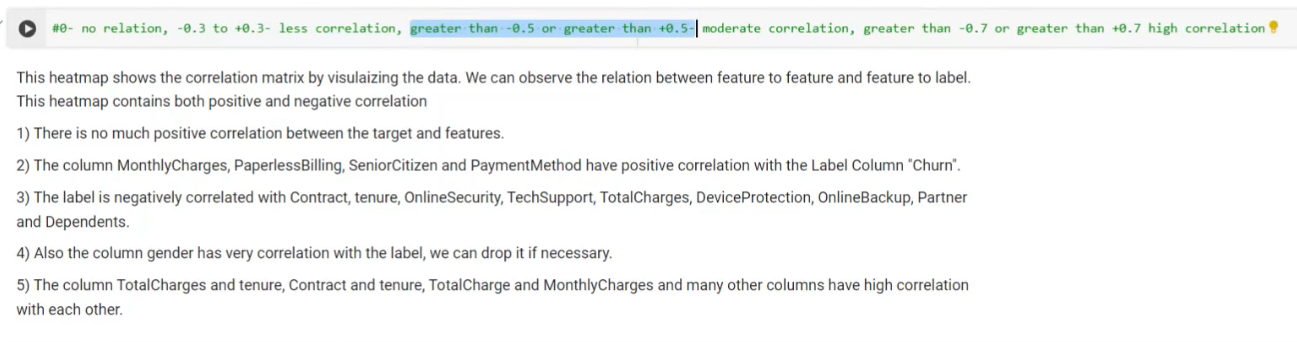


In [ ]:
cor['Churn'].sort_values(ascending = False)

In [ ]:
#we can Observe the positive and negitive correlated features with target
# Visualising the correlation between label and features using bar plot

df.corr()['Churn'].sort_values(ascending = False).drop(['Churn']).plot(kind='bar', color = "m")
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('target', fontsize = 15)
plt.title("Correlation between label and features using barplot ", fontsize = 20)
plt.show()



From the above bar plot ,we can notice the positive and negitive correlatin between the feature and the target .

Here the feature gender and Phoneservice have very less correlation with the column

***Seperate Featurtes and Label **

```
# This is formatted as code
```



In [ ]:
x = df.drop("Churn", axis = 1)
y = df["Churn"]

**Feature scalling using standerd scalarization **



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

we have scaled the data using standerd scalarization method to overcome the issue of biasness


In [ ]:
#Finding variance inflation factor in each scaled column i.e x.shape[1](1/(1-R2))
from  statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i  in range (len(x.columns))]
vif["Features"] = x.columns
vif

By checking VIF vaues we can find the features causing multicollinearity problem .

here we can find the feature TotalChanges and tenure have VIF value greater than 10 which means they have high correlation with other features.

we will drop one of the column first ,if the same issue exist then we will try to remove the column having high VIF


In [ ]:
#Dropping the TotalCharges  column
x.drop("TotalCharges", axis = 1, inplace = True )

In [ ]:
# Again checking VIF values to confirm whether the multicollinearity still exists or not

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i  in range (len(x.columns))]
vif["Features"] = x.columns
vif

So , We have solved the multicolinearity issue .we can now move ahead for model building

In [ ]:
y.value_counts()

In [ ]:
#x.value_counts('SeniorCitizen')

Here we can see that the data is not balanced ,since it is a classificaiton problem we will balance the data using oversampling method

**Oversampling **is a technique used in artificial intelligence to address the issue of class imbalance in datasets, where one class significantly outnumbers the others. This imbalance can lead to biased models that do not perform well on the minority class, which is often the class of interest. Here are some common oversampling methods:

**Random Oversampling:** This method involves randomly duplicating examples from the minority class in the training dataset. It’s a simple approach but can lead to overfitting as it replicates the minority class examples without adding any new information1.

**SMOTE (Synthetic Minority Oversampling Technique)**: SMOTE generates synthetic examples for the minority class. This technique works by selecting two or more similar instances (using a distance measure) and creating a new instance that is a combination of the features of these instances. This helps to create a more generalised decision boundary2.

**ADASYN (Adaptive Synthetic Sampling Approach for Imbalanced Learning):** Similar to SMOTE, ADASYN also generates synthetic data, but with a focus on generating more samples near the decision boundary where the classifier is more likely to make mistakes. This is done by creating synthetic data points based on the density distribution of minority class examples2.

These methods help to balance the class distribution in a dataset, which can improve the performance of machine learning models on imbalanced datasets. It’s important to note that while oversampling can improve model performance, it can also increase the risk of overfitting, so it should be used with care.

###Oversampling

In [ ]:
# Oversampling the data ()
!pip install imblearn


In [ ]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [ ]:
# Checking values count of target column
y.value_counts()

In [ ]:
# Checking values count of target column
y1.value_counts()

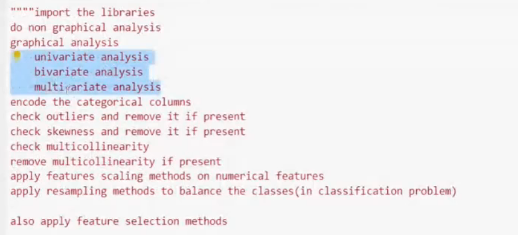



Now the data is balanced .now we can build machine learning classification models

##Finding the best random state


In [ ]:
from sklearn.model_selection  import train_test_split
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics  import accuracy_score

maxAccu = 0
maxRS = 0
for i in range(1, 200):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.25,random_state = i)
  RFR = RandomForestClassifier()
  RFR.fit(x_train, y_train)
  pred = RFR.predict(x_test)
  acc = accuracy_score(y_test, pred)
  if acc>maxAccu:
    maxAccu = acc
    maxRS = i
print("best accuracy is ", maxAccu, "at random_state", maxRS)

**Creating train test split**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = maxRS)

##Classification Algorithms

In [ ]:
from  sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score




##**Random Forest Classifier **

In [ ]:
# Checking Accuracy for Random ForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print("Confusion Matric" , confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


##**Logistic Regression **

In [ ]:
# Checking Accuracy for Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print("Confusion Matric" , confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

# Checking Accuracy for SVC -  Support vector machine classifier


In [ ]:
svc  = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print("Confusion Matric" , confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

###Gradient Boosting Classifier



In [ ]:
GB  = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print("Confusion Matric" , confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

##AdaBoost Classifier

In [ ]:
# Check accuracy for AdaBoost Classifier

ABC  = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print("Confusion Matric" , confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

##**Extra Trees Classifier**

In [ ]:
ET  = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = ET.predict(x_test)
print(accuracy_score(y_test,predET))
print("Confusion Matric" , confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

In [ ]:
#Bagging Classifier
BC  = BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print("Confusion Matric" , confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

##Cross Validation Score



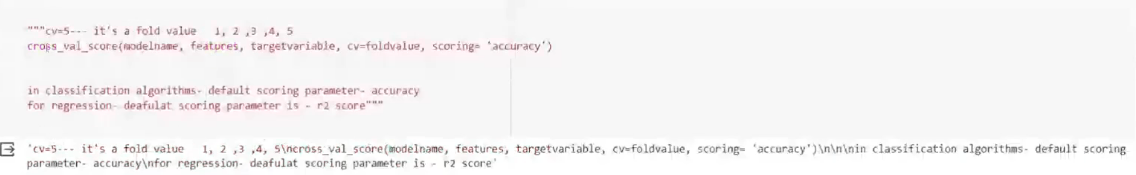



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
"""cv = 5--- it's a folder value 1,2,3 4,5
cross_val_score(modelname, features, targetvariable, cv= foldvalue, scoring = 'accuracy')

in calssification algorithms -default scoring parameter- accuracy
for regression- default scoring parameter is - r2 score """

In [ ]:
# Checking CV Score for Random Forest Classifier

score = cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print("Difference between auucracy score and cross validation score is : ", accuracy_score(y_test,predRFC) - score.mean())

In [ ]:
#Checking CV score for Logistic Regression
score = cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print("Difference between auucracy score and cross validation score is : ", accuracy_score(y_test,predLR) - score.mean())

In [ ]:
#Checking CV score for Gradient Boosting Classifier
score = cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print("Difference between auucracy score and cross validation score is : ", accuracy_score(y_test,predGB) - score.mean())

In [ ]:
#Checking CV score for SVC
score = cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print("Difference between auucracy score and cross validation score is : ", accuracy_score(y_test,predsvc) - score.mean())

In [ ]:
#Checking CV score for Ada Boosting Classifier
score = cross_val_score(ABC,x1,y1)
print(score)
print(score.mean())
print("Difference between auucracy score and cross validation score is : ", accuracy_score(y_test,predABC) - score.mean())

In [ ]:
#Checking CV score for Bagging Classifier
score = cross_val_score(BC,x1,y1)
print(score)
print(score.mean())
print("Difference between auucracy score and cross validation score is : ", accuracy_score(y_test,predBC) - score.mean())

In [ ]:
#Checking CV score for ExtraTree Classifier
score = cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print("Difference between auucracy score and cross validation score is : ", accuracy_score(y_test,predET) - score.mean())

Extra Trees classifier is our best model as the difference between accuracy score and cross validation score is least

##Hyper Parameter Tuning

In [ ]:
#Extra Trees Classifier
from sklearn.model_selection import GridSearchCV

perameters = { 'criterion': ['gini','entropy'],
              'random_state': [10,50,1000],
               'max_depth': [0,10,20],
               'n_jobs': [-2, -1,1],
               'n_estimators' : [50,100,200,300]}

In [ ]:
GCV = GridSearchCV(ExtraTreesClassifier(), perameters, cv = 5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Final_model = ExtraTreesClassifier(criterion= 'gini',max_depth = 10,n_estimators=200, n_jobs = -2, random_state=1000)
Final_model.fit(x_train,y_train)
pred_final = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred_final)
print(acc * 100)


In [ ]:
# Same data Cheking with different perameters like  criterion and random state values :

Final_model = ExtraTreesClassifier(criterion= 'entropy',max_depth = 10,n_estimators=200, n_jobs = -2, random_state=50)
Final_model.fit(x_train,y_train)
pred_final = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred_final)
print(acc * 100)


##**plotting ROC and compate AUC for all the models used **

In [ ]:
!pip install scikit-learn

 ## plot_roc_curve getting error due to new libries updated with new version .

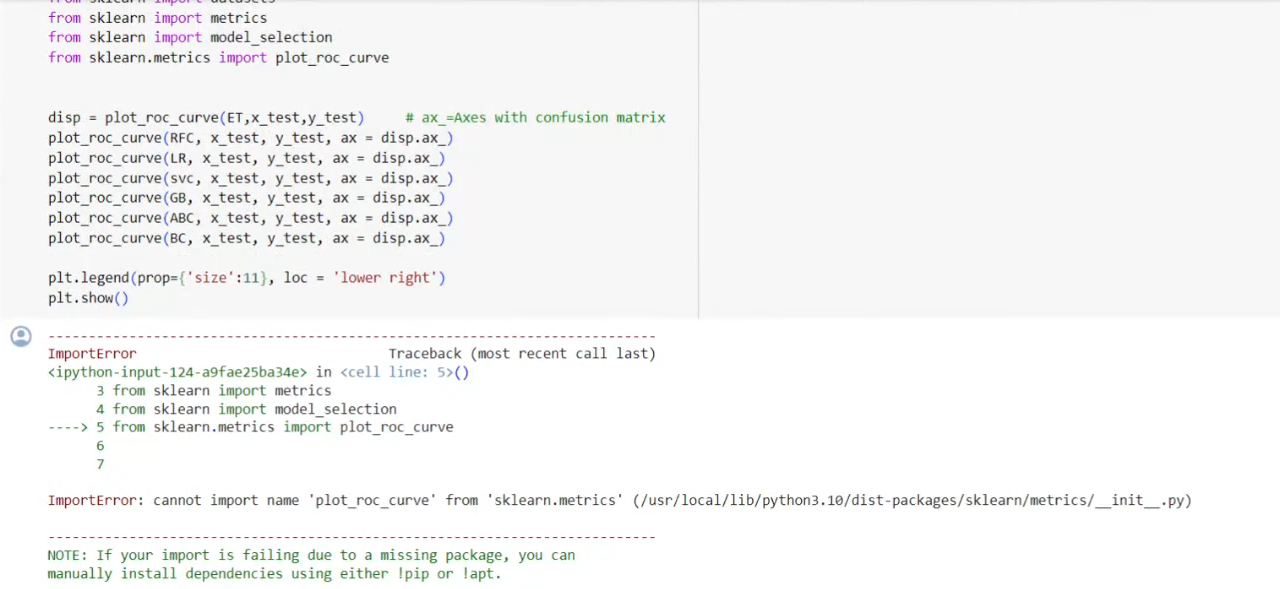




In [ ]:
# plotting for all the models used here
from sklearn import metrics
fpr, tpr ,thresholds = metrics.roc_curve(y_test, pred_final)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name= Final_model)
display.plot()




Here we hae plotted the ROC curve for the final model and the AUC value for the best model is 79.69

**Saving the Model **

In [ ]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model, "Telecom_Customer_churn_analysis.pkl")

##Predicting the saved model

In [ ]:
#lets load the saved model and get the predictions
model = joblib.load("Telecom_Customer_churn_analysis.pkl")

#Prediction
predection = model.predict(x_test)
predection



In [ ]:
a = np.array(y_test)
df = pd.DataFrame()
df["predected"] = predection
df["Original"] = a
df